In [32]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
import xarray as xr
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [30]:
# 1
a = pd.read_csv('usgs_earthquakes.csv')
b=a.sort_values('mag',ascending=False).head(50)

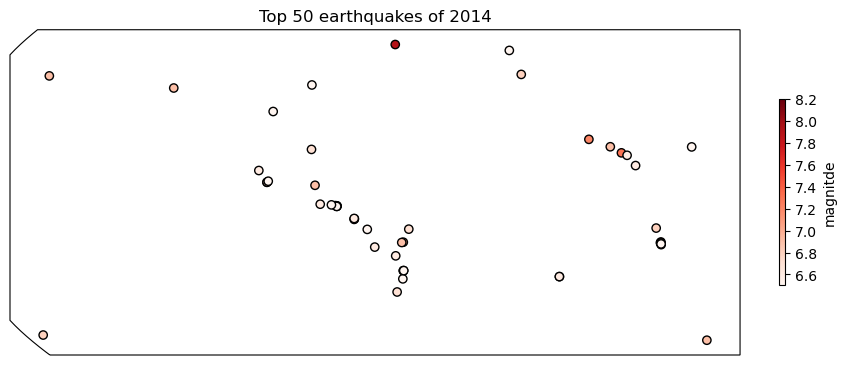

In [38]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)


# Create an axes with an basic PlateCarree projection style
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
lon = b['longitude']
lat = b['latitude']
plt.scatter(lon,lat,marker='o',linewidth=1, edgecolor='black',transform=ccrs.PlateCarree(),c = b['mag'],cmap='Reds')

# Set title
ax.set_title('Top 50 earthquakes of 2014')
# Configure the Colorbar
from matplotlib import ticker
cb = plt.colorbar(fraction = 0.008,aspect = 30,label = 'magnitde')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.show()

In [39]:
# 2
# 2.1
c=xr.open_dataset('200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', engine='netcdf4')
c

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

In [41]:
c.sel(time=slice('2013','2020')).mean(dim='time')

<xarray.Dataset>
Dimensions:                  (lat: 36, bnds: 2, lon: 72, pressure: 10)
Coordinates:
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    lat_bnds                 (lat, bnds) float64 -90.0 -85.0 -85.0 ... 85.0 90.0
    lon_bnds                 (lon, bnds) float64 -180.0 -175.0 ... 175.0 180.0
    pre                      (pressure) float64 0.95 0.85 0.75 ... 0.15 0.05
    pre_bnds                 (pressure, bnds) float64 1.0 0.9 0.9 ... 0.1 0.0
    land_fraction            (lat, lon) float64 0.9982 0.9998 0.9998 ... 0.0 0.0
    xch4                     (lat, lon) float32 nan nan nan nan ... nan nan nan
    xch4_nobs                (lat, lon) float64 nan nan nan nan ... nan nan nan
    xch4_stderr              (lat, lon) float32 nan nan nan nan ... nan nan nan
    xch4_stddev              (lat, lon) float32 nan nan nan nan ... nan nan nan
    column_averaging_kernel  (pressure, lat, lon) float32 nan nan ... nan nan
    vmr_profile_ch4_apriori  (pressure, lat, lon) float32 nan nan ... nan nan

AttributeError: '_Dataset_PlotMethods' object has no attribute 'contourf'

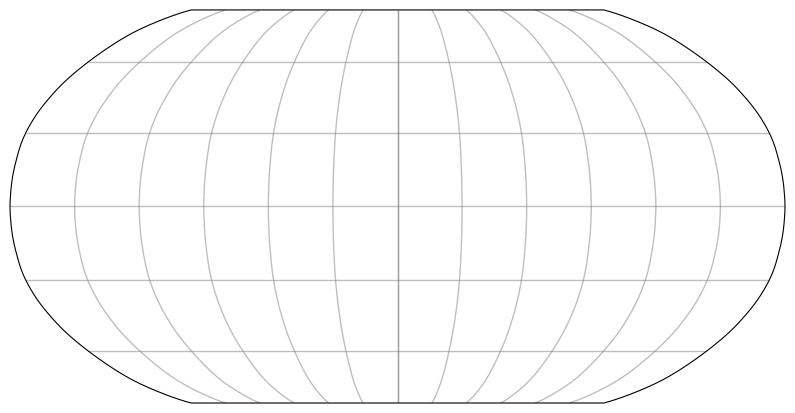

In [43]:
plt.figure(figsize=(10,10), dpi=100)
# Create an axes with Orthographic projection style
proj = ccrs.Robinson(central_longitude=180) 
ax = plt.axes(projection=proj)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='grey', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))
c.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='magma',
                       vmin=0, vmax=15, levels=20,cbar_kwargs={'fraction': 0.008,'aspect' : 30,'label' : 'magnitde'})

ax.add_feature(cfeature.COASTLINE, edgecolor='white', zorder=1)
ax.set_title('Average Pressure from 2013-2020')